In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

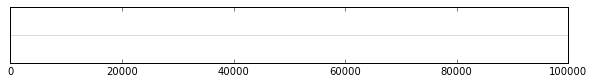

In [50]:
import numpy as np

X = np.arange(100000)

plt.figure(figsize=(10, 1))
plt.axis([0, len(X), -1, 1])
plt.axes().get_yaxis().set_visible(False)
plt.axhline(0, color='#dddddd')
plt.show()

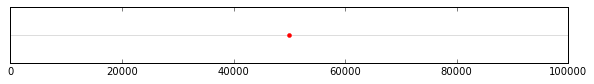

In [57]:
X = np.arange(100000)

plt.figure(figsize=(10, 1))
plt.axis([0, len(X), -1, 1])
plt.axes().get_yaxis().set_visible(False)
plt.axhline(0, color='#dddddd')
plt.plot([50000], [0], '.', color="red", ms=8)
plt.show()